In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_NE_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47,0.18,0.5,0.0,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,0.0,NaN,0.66
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,0.45,0.62,0.25,0.5,0.0,0.59,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	74
float64		column 2	74
float64		column 3	148
float64		column 4	111
float64		column 5	74
float64		column 6	37
float64		column 7	74
float64		column 8	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1410.000000,1410.000000,1336.000000,1373.000000,1410.000000,1447.000000,1410.000000,1484.000000
mean,0.500369,0.500206,0.500666,0.259046,0.504255,0.007692,0.500220,0.276199
std,0.136455,0.121787,0.083712,0.133923,0.045946,0.076635,0.056113,0.106491
min,0.110000,0.130000,0.210000,0.000000,0.500000,0.000000,0.130000,0.000000
25%,0.410000,0.420000,0.460000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.570000,0.570000,0.550000,0.310000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,1.000000,0.870000,1.000000,0.830000,0.730000,1.000000


<AxesSubplot:>

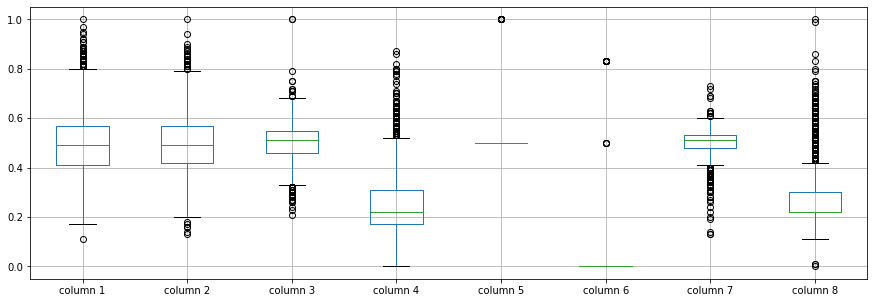

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.500369
column 2    0.500206
column 3    0.500666
column 4    0.259046
column 5    0.504255
column 6    0.007692
column 7    0.500220
column 8    0.276199
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.572900,-0.188424,0.175763,0.065870,0.005249,0.066202,-0.130183
column 2,0.572900,1.000000,-0.279444,0.135494,0.018162,-0.000302,0.086096,-0.100867
column 3,-0.188424,-0.279444,1.000000,0.093495,0.016439,0.009418,-0.206784,-0.018746
column 4,0.175763,0.135494,0.093495,1.000000,-0.004884,-0.008667,-0.124152,-0.058830
column 5,0.065870,0.018162,0.016439,-0.004884,1.000000,-0.009681,0.031544,0.008056
column 6,0.005249,-0.000302,0.009418,-0.008667,-0.009681,1.000000,0.016879,-0.036033
column 7,0.066202,0.086096,-0.206784,-0.124152,0.031544,0.016879,1.000000,0.086706
column 8,-0.130183,-0.100867,-0.018746,-0.058830,0.008056,-0.036033,0.086706,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+10,8+10+10,8+10+10+10,8+10+10+10+10,8+10+10+10+10+10,8+10+10+10+10+10+10,8+10+10+10+10+10,8+10+10+10+10,8+10+10+10,8+10+10,8+10,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.8865776709888293
Epoch: 1 , loss: 2.6241106416868125
Epoch: 2 , loss: 2.316628493692564
Epoch: 3 , loss: 2.1694085312926252
Epoch: 4 , loss: 2.010892216278159
Epoch: 5 , loss: 1.9276209849378336
Epoch: 6 , loss: 1.8299276893553527
Epoch: 7 , loss: 1.7309516849725142
Epoch: 8 , loss: 1.63041945255321
Epoch: 9 , loss: 1.6009907139384227
Epoch: 10 , loss: 1.543198832999105
Epoch: 11 , loss: 1.4948806205521459
Epoch: 12 , loss: 1.4472402567448823
Epoch: 13 , loss: 1.4088063162306081
Epoch: 14 , loss: 1.3654007989427317
Epoch: 15 , loss: 1.3474755662938822
Epoch: 16 , loss: 1.3011069116385088
Epoch: 17 , loss: 1.312261901471926
Epoch: 18 , loss: 1.2752748604701913
Epoch: 19 , loss: 1.2570685310208278
Epoch: 20 , loss: 1.2371402123700017
Epoch: 21 , loss: 1.2215711422588513
Epoch: 22 , loss: 1.241043975819712
Epoch: 23 , loss: 1.2041482763445897
Epoch: 24 , loss: 1.2084198509869368
Epoch: 25 , loss: 1.16537

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.43
column 2    0.44
column 3    0.48
column 4    0.22
column 5    0.50
column 6    0.00
column 7    0.51
column 8    0.22
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...
1479,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1480,0.0,0.0,0.0,0.0,0.0,0.0,-0.087391,0.0
1481,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1482,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(4.3293355025874325, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.09230177032052335

In [18]:
new_df.iloc[66,:]

column 1    0.46
column 2    0.49
column 3    0.58
column 4    0.23
column 5    0.50
column 6    0.00
column 7    0.44
column 8    0.22
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.58,0.61,0.47,0.13,0.5,0.0,0.480000,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.530000,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.530000,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.540000,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.480000,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,0.63,0.47,0.18,0.5,0.0,0.500000,0.22
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.452609,0.66
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.530000,0.37
1482,0.51,0.45,0.62,0.25,0.5,0.0,0.590000,0.22


In [20]:
imputations[-1].to_excel("Yeast_NE_5(imp).xlsx", index=False, header=False)